In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
id=np.load("../data/generate_data/id")

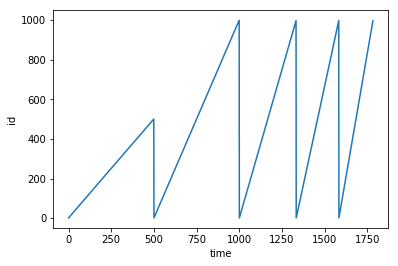

In [3]:
plt.plot(range(len(id)),id)
plt.ylabel("id")
plt.xlabel("time")
plt.savefig("../img/id_tendency")

In [4]:
from keras.layers.core import Dense,Activation
from keras.layers.recurrent import SimpleRNN,LSTM
from keras.models import Sequential
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import math
import os
from keras.utils import plot_model
from keras.models import load_model

/home/drdh/.local/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [5]:
id=np.load("../data/generate_data/id")
id=id.reshape(-1,1)
id=np.divide(id,1000)
id.shape

(1783, 1)

In [6]:
NUM_TIMESTEPS=10
HIDDEN_SIZE=32
BATCH_SIZE=32

X=np.zeros((id.shape[0],NUM_TIMESTEPS))
Y=np.zeros((id.shape[0],1))

for i in range(len(id)-NUM_TIMESTEPS):
    X[i]=id[i:i+NUM_TIMESTEPS].T
    Y[i]=id[i+NUM_TIMESTEPS]-id[i+NUM_TIMESTEPS-1]
X=np.expand_dims(X,axis=2)

In [7]:
sp=int(0.85*len(id))
Xtrain,Xtest,Ytrain,Ytest=X[0:sp],X[sp:],Y[0:sp],Y[sp:]

In [13]:
NUM_EPOCHS=40
model=Sequential()
model.add(LSTM(HIDDEN_SIZE,input_shape=(NUM_TIMESTEPS,1),return_sequences=False))
model.add(Dense(1))
#model.add(Activation("softmax"))

model.compile(loss="mean_squared_error",optimizer="adam",metrics=["mean_squared_error"])

history=model.fit(Xtrain,Ytrain,epochs=NUM_EPOCHS,batch_size=BATCH_SIZE,validation_data=(Xtest,Ytest))
plot_model(model,to_file="../img/id_LSTM_model.png",show_shapes=True)
model.summary()

Train on 1515 samples, validate on 268 samples
Epoch 1/40
1515/1515 [==============================] - 1s 664us/step - loss: 0.0018 - mean_squared_error: 0.0018 - val_loss: 0.0037 - val_mean_squared_error: 0.0037
Epoch 2/40
1515/1515 [==============================] - 1s 371us/step - loss: 0.0015 - mean_squared_error: 0.0015 - val_loss: 0.0037 - val_mean_squared_error: 0.0037
Epoch 3/40
1515/1515 [==============================] - 1s 361us/step - loss: 0.0015 - mean_squared_error: 0.0015 - val_loss: 0.0039 - val_mean_squared_error: 0.0039
Epoch 4/40
1515/1515 [==============================] - 1s 365us/step - loss: 0.0015 - mean_squared_error: 0.0015 - val_loss: 0.0037 - val_mean_squared_error: 0.0037
Epoch 5/40
1515/1515 [==============================] - 1s 361us/step - loss: 0.0015 - mean_squared_error: 0.0015 - val_loss: 0.0037 - val_mean_squared_error: 0.0037
Epoch 6/40
1515/1515 [==============================] - 1s 370us/step - loss: 0.0015 - mean_squared_error: 0.0015 - val_los

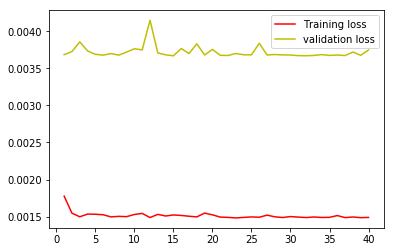

In [14]:
mean=history.history['mean_squared_error']
val_mean=history.history['val_mean_squared_error']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(1,len(mean)+1)

#plt.plot(epochs,mean,'b',label="Training mean")
#plt.plot(epochs,val_mean,'g',label="Validation mean")
plt.plot(epochs,loss,'r',label="Training loss")
plt.plot(epochs,val_loss,'y',label="validation loss")

plt.legend()
#plt.figure()
plt.savefig("../img/id_LSTM.png")
#plt.show()

In [52]:
model.save("../model/id_SimpleRNN.h5")
model_r=load_model("../model/id_SimpleRNN.h5")

In [56]:
a=[1,2,3,4,5,6,7,8,9,10]
b=np.array(a)
#b=scaler.fit_transform(b)
b=b.reshape(1,10,1)
b=np.divide(b,1000)
#b=scaler.fit_transform(b)
pred=model.predict(b)[0,0]
pred*1000

2.3082809057086706

In [57]:
import predict
import imp
imp.reload(predict)

<module 'predict' from '/home/drdh/lx/X-dll/LSTM/model/model_src/predict.py'>

In [67]:
predict.network([10,11,12,3],24,1,[1,4],500,1,4,[18,6,2,17],[18,6,2,7],[18,6,2,7],1)

([0, 0, 0, 1, 2, 0, 0, 0, 0, 0],
 1,
 1,
 [0, 0, 1, 0, 0],
 0,
 1,
 4,
 [0, 0, 0, 0],
 [0, 0, 0, 1],
 [0, 0, 1, 0],
 1)